# Predicción de primas de seguro:

El conjunto de datos contiene algunos atributos para cada persona, como: edad, sexo, índice de masa corporal, niños, fumador, región y sus cargos

## Objetivo:

usar esta información para predecir cargos para nuevos clientes

In [1]:
import pandas as pd
insurance = pd.read_csv('insurance.csv')

In [2]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# muestra información del dataframe insurance
# Completa
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
# Describe estadísticamente el df insurance
# Completa
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
# obten los valores nulos
insurance.isnull().values

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [42]:
print("Renglones            :", insurance.shape[0])
print("Columnas             :", insurance.shape[1])
print("\nCaracterísticas    :", insurance.columns.tolist())
print("\nValores perdidos   :", insurance.isnull().sum().sum())
print("\nValores únicos     :\n", insurance.nunique())

Renglones            : 1338
Columnas             : 6

Características    : ['age', 'sex', 'bmi', 'children', 'smoker', 'charges']

Valores perdidos   : 0

Valores únicos     :
 age           47
sex            2
bmi          548
children       6
smoker         2
charges     1337
dtype: int64


In [8]:
numeric_insurance = insurance.select_dtypes(include=['int64', 'float64'])

In [10]:
#Obten la correlación del df insurance
numeric_insurance.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<Axes: >

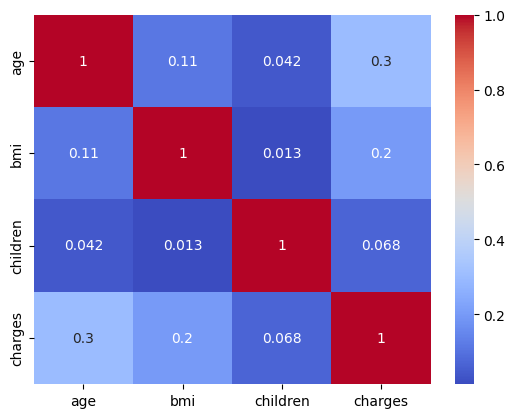

In [11]:
# Obten la gráfica de la matriz de correlación

import seaborn as sns

# Calcular la matriz de correlacion
corr = numeric_insurance.corr()

# Grafica de la matriz de correlacion
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [12]:
insurance.columns.to_list()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

<Axes: ylabel='Frequency'>

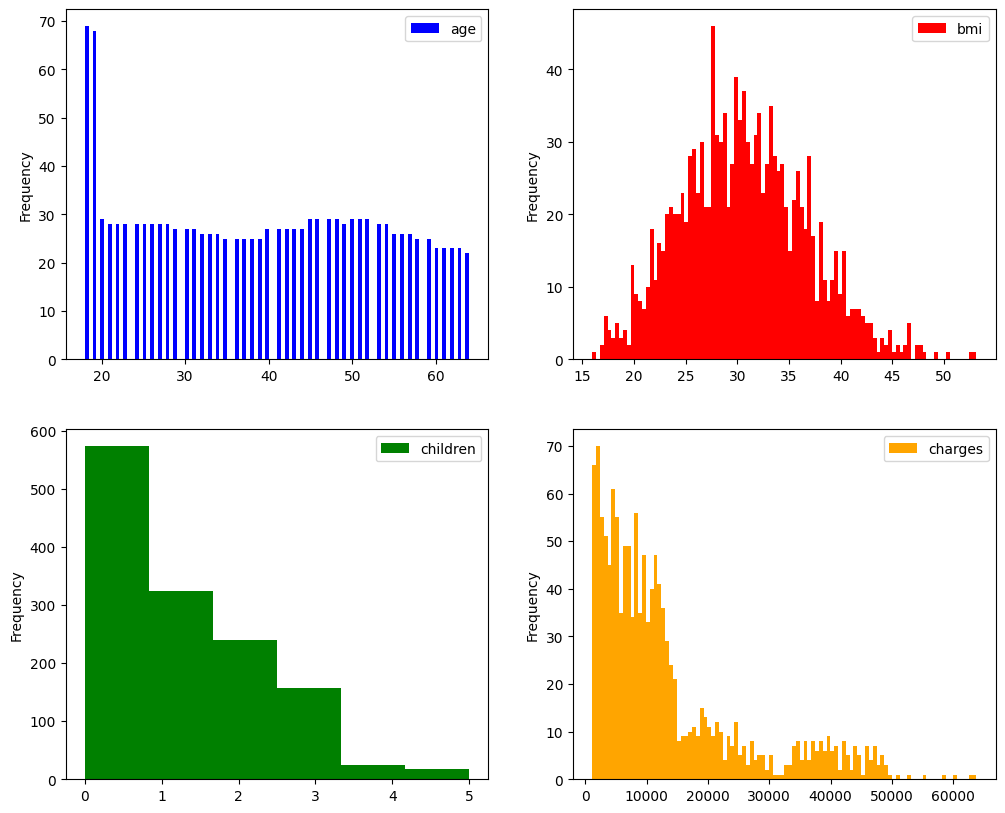

In [13]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
insurance.plot(kind="hist", y="age", bins=100, color="b",
               ax=axes[0][0])
insurance.plot(kind="hist", y="bmi", bins=100, color="r",
               ax=axes[0][1])
insurance.plot(kind="hist", y="children", bins=6, color="g",
               ax=axes[1][0])
insurance.plot(kind="hist", y="charges", bins=100, color="orange",
               ax=axes[1][1])

<Axes: xlabel='sex'>

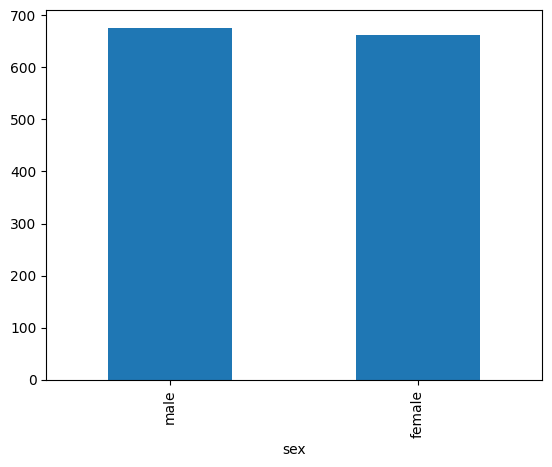

In [14]:
insurance['sex'].value_counts().plot(kind = "bar")

<Axes: xlabel='smoker'>

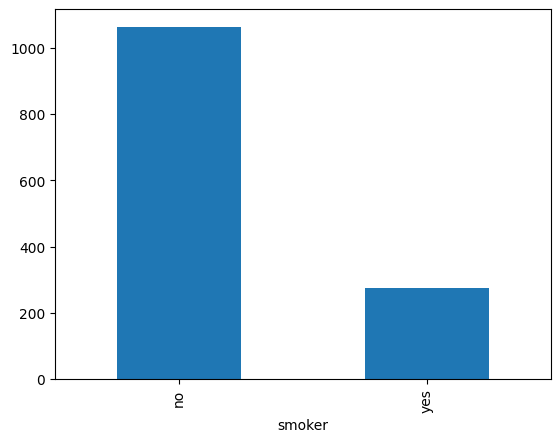

In [15]:
insurance['smoker'].value_counts().plot(kind = "bar")

<Axes: title={'center': 'Children vs. Charges'}, xlabel='children', ylabel='charges'>

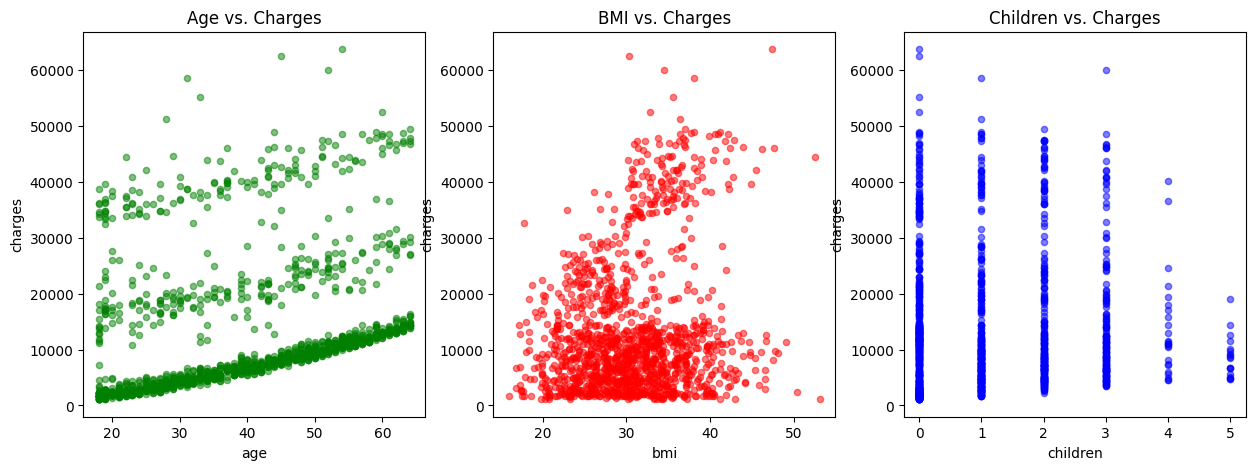

In [16]:
from matplotlib.pyplot import title


fig,axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
insurance.plot(kind = 'scatter', x='age', y='charges',
               alpha=0.5, color='green',ax=axes[0],
               title="Age vs. Charges")
insurance.plot(kind = 'scatter', x='bmi', y='charges',
               alpha=0.5, color='red',ax=axes[1],
               title="BMI vs. Charges")
insurance.plot(kind = 'scatter', x='children', y='charges',
               alpha=0.5, color='blue',ax=axes[2],
               title="Children vs. Charges")

<Axes: xlabel='bmi', ylabel='charges'>

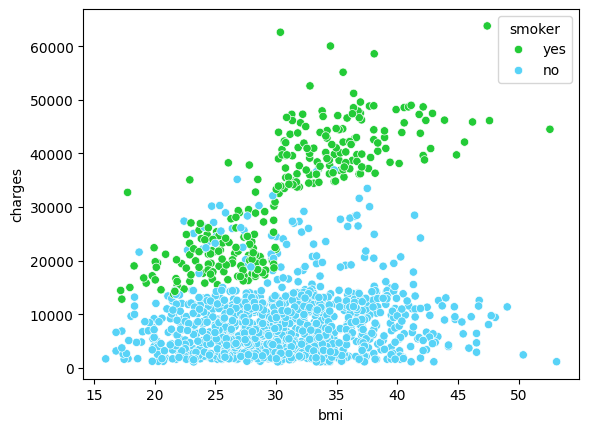

In [17]:

pal = ["#23CB37","#58D3F7"]
sns.scatterplot (x="bmi", y="charges", data = insurance,
                 palette=pal, hue="smoker")

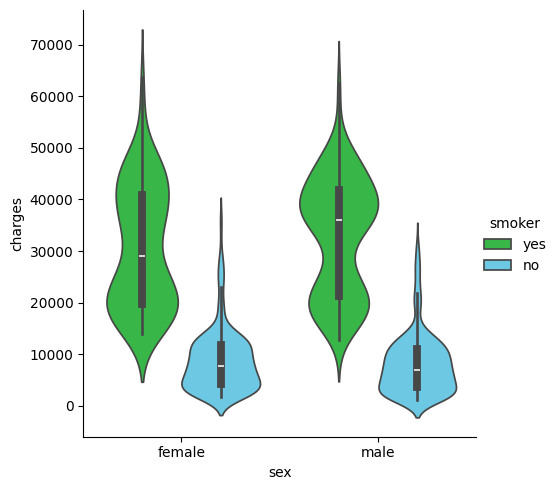

In [18]:
sns.catplot(x="sex", y="charges", hue="smoker", kind ='violin',
            data=insurance, palette=pal)

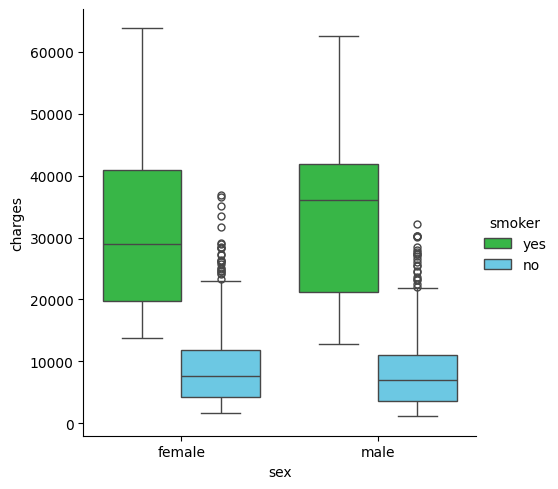

In [19]:
sns.catplot(x="sex", y="charges", hue="smoker", kind ='box',
            data=insurance, palette=pal)

Text(0.5, 1.0, 'Smokers')

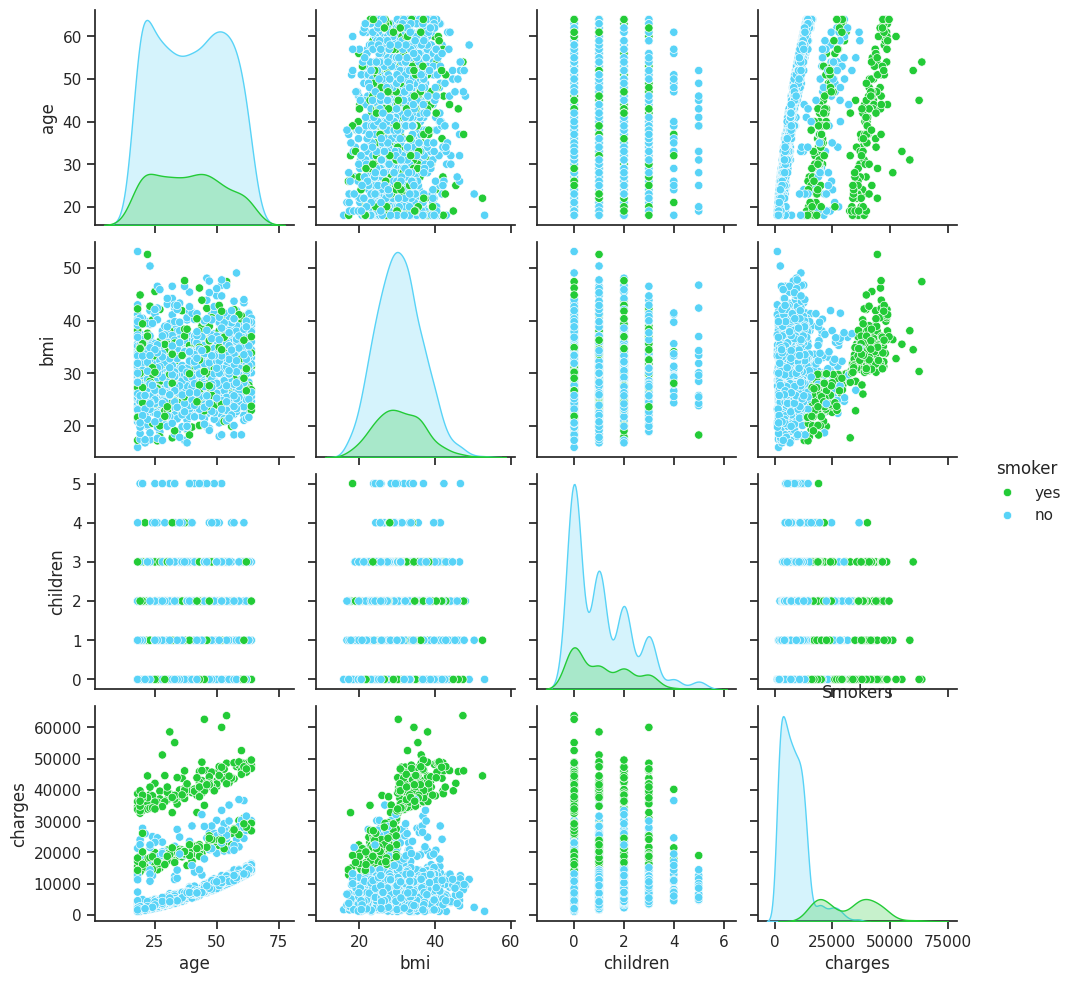

In [20]:

# Gráfica pairplot

sns.set(style="ticks")
sns.pairplot(insurance, hue="smoker", palette=pal)
plt.title("Smokers")

# Preparación de los datos para algoritmos ML

In [21]:
# Muestra los primeros renglones del df insurance

insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [22]:
insurance['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [23]:
insurance.drop(["region"], axis=1, inplace=True)
insurance.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


In [24]:
# transforma los atributos 'sex' y 'smoker' a variable indicadora

insurance['sex'] = insurance['sex'].map(lambda s :1
                                        if s== 'female' else 0)
insurance['smoker'] = insurance['smoker'].map(lambda s :1
                                       if s== 'yes' else 0)
insurance.head()

,age,sex,bmi,children,smoker,charges
0,19,1,27.900,0,1,16884.92400
1,18,0,33.770,1,0,1725.55230
2,28,0,33.000,3,0,4449.46200
3,33,0,22.705,0,0,21984.47061
4,32,0,28.880,0,0,3866.85520


In [25]:
# obten el conjunto de atributos X
X = insurance.drop('charges', axis=1)

In [26]:
X

,age,sex,bmi,children,smoker
0,19,1,27.900,0,1
1,18,0,33.770,1,0
2,28,0,33.000,3,0
3,33,0,22.705,0,0
4,32,0,28.880,0,0
...,...,...,...,...,...
1333,50,0,30.970,3,0
1334,18,1,31.920,0,0
1335,18,1,36.850,0,0
1336,21,1,25.800,0,0


In [27]:
# Obten el conjunto de valores de la variale dependiente y
y = insurance['charges']

In [28]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

# Modelando los datos

In [40]:
# importa librerias necesarias para regresión línueal múltiple
from random import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Obtener el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split (X,y, random_state=0)

# Normalizar los datos

sc = StandardScaler()
X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

# Ajusta el modelo para el conjunto de datos de entrenamiento
# Completa
multiple_linear_reg = LinearRegression()
multiple_linear_reg.fit(X_train, y_train)

# Obten los valores de predicción para los conjuntos de datos de entrenamiento y de prueba
# Completa

# Predicción con el dataset de entrenamiento:
y_pred_MLR_train = multiple_linear_reg.predict(X_train)
print("Prediccion con los datos de entrenamiento",y_pred_MLR_train)

# Predicción con el dataset de prueba
y_pred_MLR_test = multiple_linear_reg.predict(X_test)
print("Prediccion con los datos de prueba",y_pred_MLR_test)


Prediccion con los datos de entrenamiento [ 6218.53651468 10709.85863674  1390.26676102 ...  6389.32814817
  4384.12672762  2987.42720326]
Prediccion con los datos de prueba [11457.24748797  9925.93074028 37768.54941888 15853.34679049
  6939.11972533  3715.15809068  1226.51797859 14013.62531872
  8801.37793745  7319.3569299   4273.75316151 10130.71955326
  9085.31708787  4373.32320457 27814.85680664 11178.7533822
 11185.96123339  5630.52468867  8076.08092103 26738.70765833
 33571.19206907 14028.13563512 11218.6467869  32627.93297826
  4586.6864      8662.71797281   909.82505247 10181.12419998
  4318.89099156 10226.29974927  8827.54515889 40279.78845676
 15797.33819958 14003.57232067 24541.57502951  4754.90669146
 12888.4411817  30986.42695074 33296.10937045  3923.72690408
  3729.50340695  4518.10338943 30179.67003291 39152.46681933
 28159.50615257  4858.31074493 11075.11507975  7719.48440006
  3314.0509843  10750.82941843  5170.52098751  3301.78200967
 33383.67630651 37846.88608306 161

In [31]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Calculate R2 score for training data
r2_train = r2_score(y_train, y_pred_MLR_train)
print("R2 de entrenamiento para el modelo de regresión lineal múltiple: ", r2_train)

# Calculate R2 score for test data
r2_test = r2_score(y_test, y_pred_MLR_test)
print("R2 de prueba para el modelo de regresión lineal múltiple: ", r2_test)

# Calculate RMSE for training data
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_MLR_train))
print("RMSE para los datos de entrenamiento: ", rmse_train)

# Calculate RMSE for test data
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_MLR_test))
print("RMSE para los datos de prueba ", rmse_test)

R2 de entrenamiento para el modelo de regresión lineal múltiple:  0.732745261917263
R2 de prueba para el modelo de regresión lineal múltiple:  0.7952171980481992
RMSE para los datos de entrenamiento:  6179.71247272377
RMSE para los datos de prueba  5678.017317091146


## Regresión Polinómica

In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Create an instance with polynomial features of degree 3
polynomial_features = PolynomialFeatures(degree=3)

# Fit and transform the training data to polynomial
x_train_poly = polynomial_features.fit_transform(X_train)

# Fit and transform the test data to polynomial
x_test_poly = polynomial_features.transform(X_test)

# Create an instance for the linear regression model
polynomial_reg = LinearRegression()

# Fit the data to the model
polynomial_reg.fit(x_train_poly, y_train)

LinearRegression()

### Evaluación del modelo de regresión polinomial

In [33]:
# Prediction with the training dataset:
y_pred_PR_train = polynomial_reg.predict(x_train_poly)

# Prediction with the test dataset
y_pred_PR_test = polynomial_reg.predict(x_test_poly)

# Calculate R2 score for training data
accuracy_PR_train = r2_score(y_train, y_pred_PR_train)
print("R2 de entrenamiento para el modelo de regresión polinomial: ", accuracy_PR_train)

# Calculate R2 score for test data
accuracy_PR_test = r2_score(y_test, y_pred_PR_test)
print("R2 de prueba para el modelo de regresión polinomial: ", accuracy_PR_test)

# Calculate RMSE for training data
RMSE_PR_train = np.sqrt(mean_squared_error(y_train, y_pred_PR_train))
print("RMSE para los datos de entrenamiento: ", RMSE_PR_train)

# Calculate RMSE for test data
RMSE_PR_test = np.sqrt(mean_squared_error(y_test, y_pred_PR_test))
print("RMSE para los datos de prueba ", RMSE_PR_test)

R2 de entrenamiento para el modelo de regresión polinomial:  0.8355069682607801
R2 de prueba para el modelo de regresión polinomial:  0.88104145726831
RMSE para los datos de entrenamiento:  4848.186464032006
RMSE para los datos de prueba  4327.606753998095


### Resultados

Explica cuál es el mejor modelo

El modelo de regresión polinomial parece ser una buena opción debido a su alto coeficiente de determinación (R2) tanto en los datos de entrenamiento como en los de prueba. Un R2 cercano a 1 indica que el modelo explica una gran parte de la variabilidad de los datos, lo que sugiere que el modelo se ajusta bien a los datos.

### Probanado el mejor regreso con nuevos datos

In [35]:
input_data = {'age': [35],
              'sex': ['male'],
              'bmi': [26],
              'children': [0],
              'smoker': ['no'],
              'region': ['southeast']}

input_data = pd.DataFrame(input_data)
input_data

,age,sex,bmi,children,smoker,region
0,35,male,26,0,no,southeast


In [36]:
 # Pre-procesamiento del dato único
input_data.drop(["region"], axis=1, inplace=True)
input_data['sex'] = input_data['sex'].map(lambda s :1
                                          if s == 'female' else 0)
input_data['smoker'] = input_data['smoker'].map(lambda s :1
                                          if s == 'yes' else 0)
input_data

,age,sex,bmi,children,smoker
0,35,0,26,0,0


In [37]:
# Escalar los datos de entrada
input_data = sc.transform(input_data)
input_data

array([[-0.30137763, -1.01506865, -0.75753763, -0.89214407, -0.50373604]])

In [38]:
# Reshape los datos de entrada en el formato requerido por el modelo de sklearn
input_data = input_data.reshape(1, -1)
print(input_data.shape)
input_data

(1, 5)


array([[-0.30137763, -1.01506865, -0.75753763, -0.89214407, -0.50373604]])

In [39]:
# Obtener la predicción para la tasa del seguro para el cliente nuevo

x_test_poly = polynomial_features.fit_transform(input_data)
polynomial_reg.predict(x_test_poly)

array([5579.875])